**Caltech 256 Dataset with Fastai V1**

Over 30,000 images in 256 object categories


Previously I have found image classification problems to be challenging when there are a large number of image classes.  Here I test the default [Fastai](http://fast.ai) image classifier against a dataset containing 256 object categories.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import fastai
print('fastai version: ',fastai.__version__)

%reload_ext autoreload
%autoreload 2
%matplotlib inline

pytorch version:  1.1.0
fastai version:  1.0.52


Classes: 
 ['056.dog', '087.goldfish', '092.grapes', '103.hibiscus', '105.horse', '113.hummingbird', '150.octopus', '152.owl', '178.school-bus', '204.sunflower-101', '221.tomato', '224.touring-bike', '252.car-side-101']


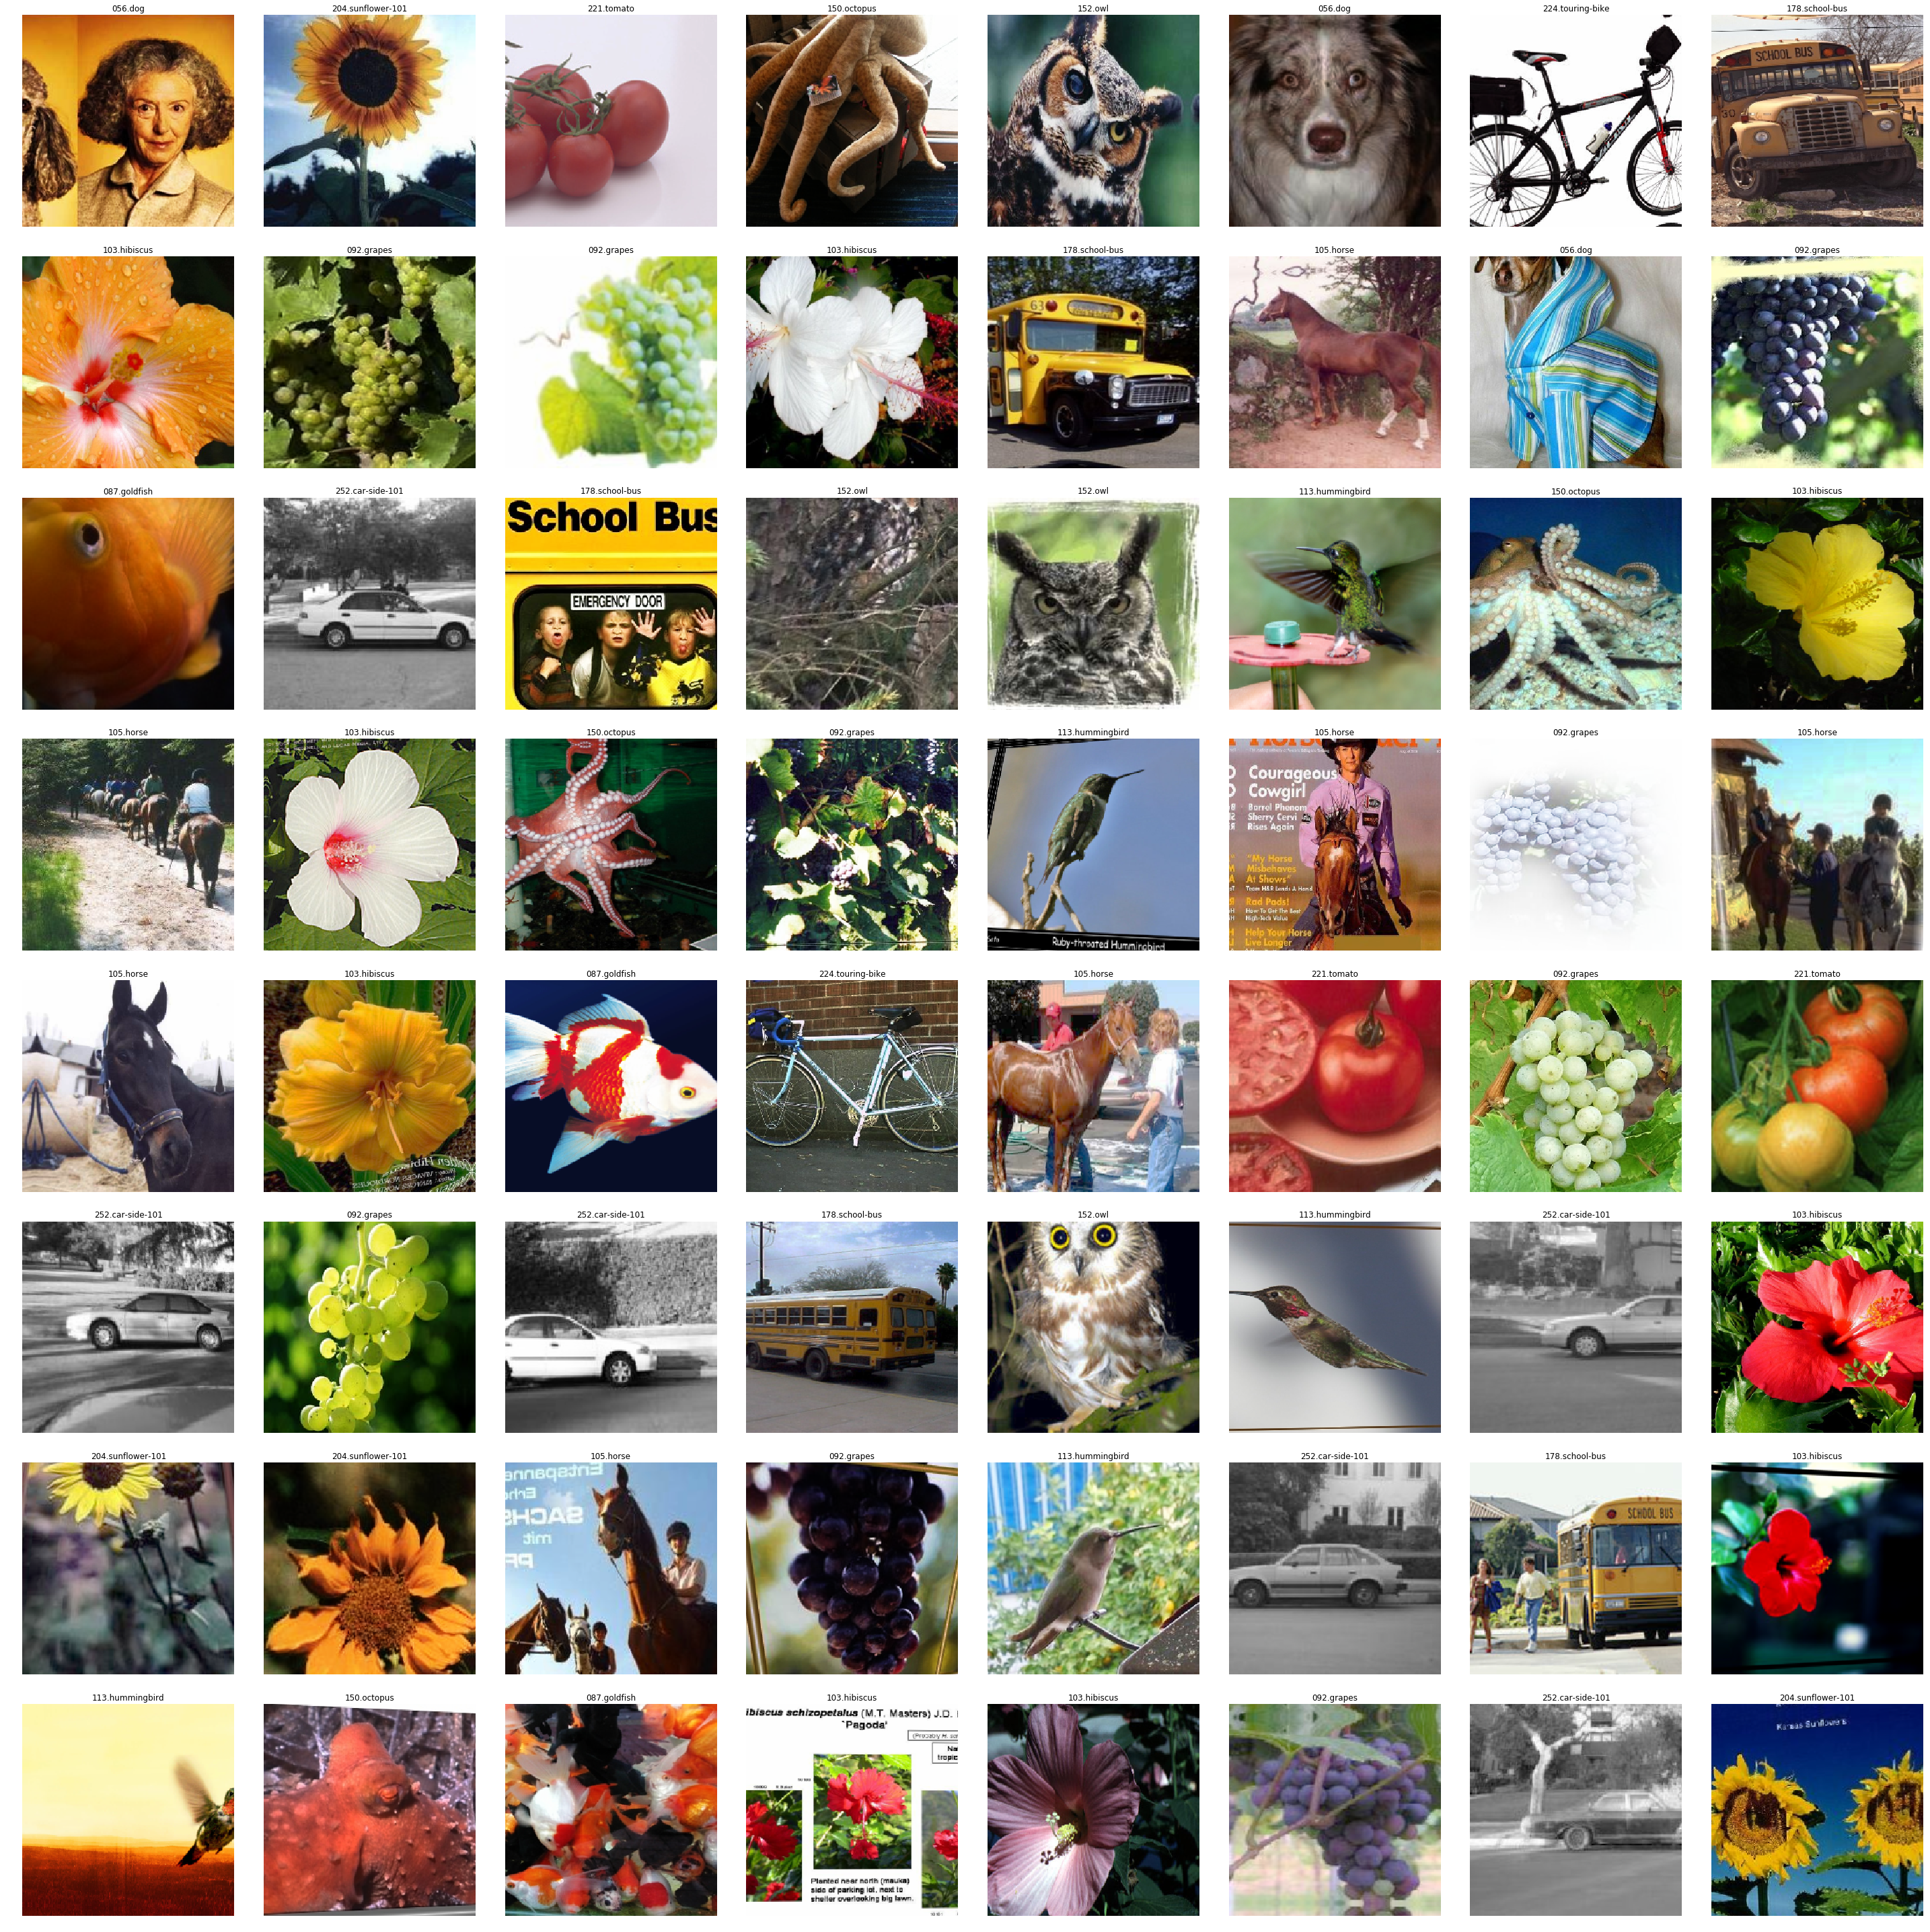

In [7]:
img_dir='./data/images'
path=Path(img_dir)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(do_flip=False,flip_vert=False, max_rotate=0,max_lighting=0.3),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')
data.show_batch(rows=8, figsize=(40,40))

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")
learn.fit_one_cycle(25)

M:\Anaconda\lib\site-packages\fastai\vision\learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\NEW LENOVO/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|█████████████████████████| 87306240/87306240 [00:28<00:00, 3110108.95it/s]


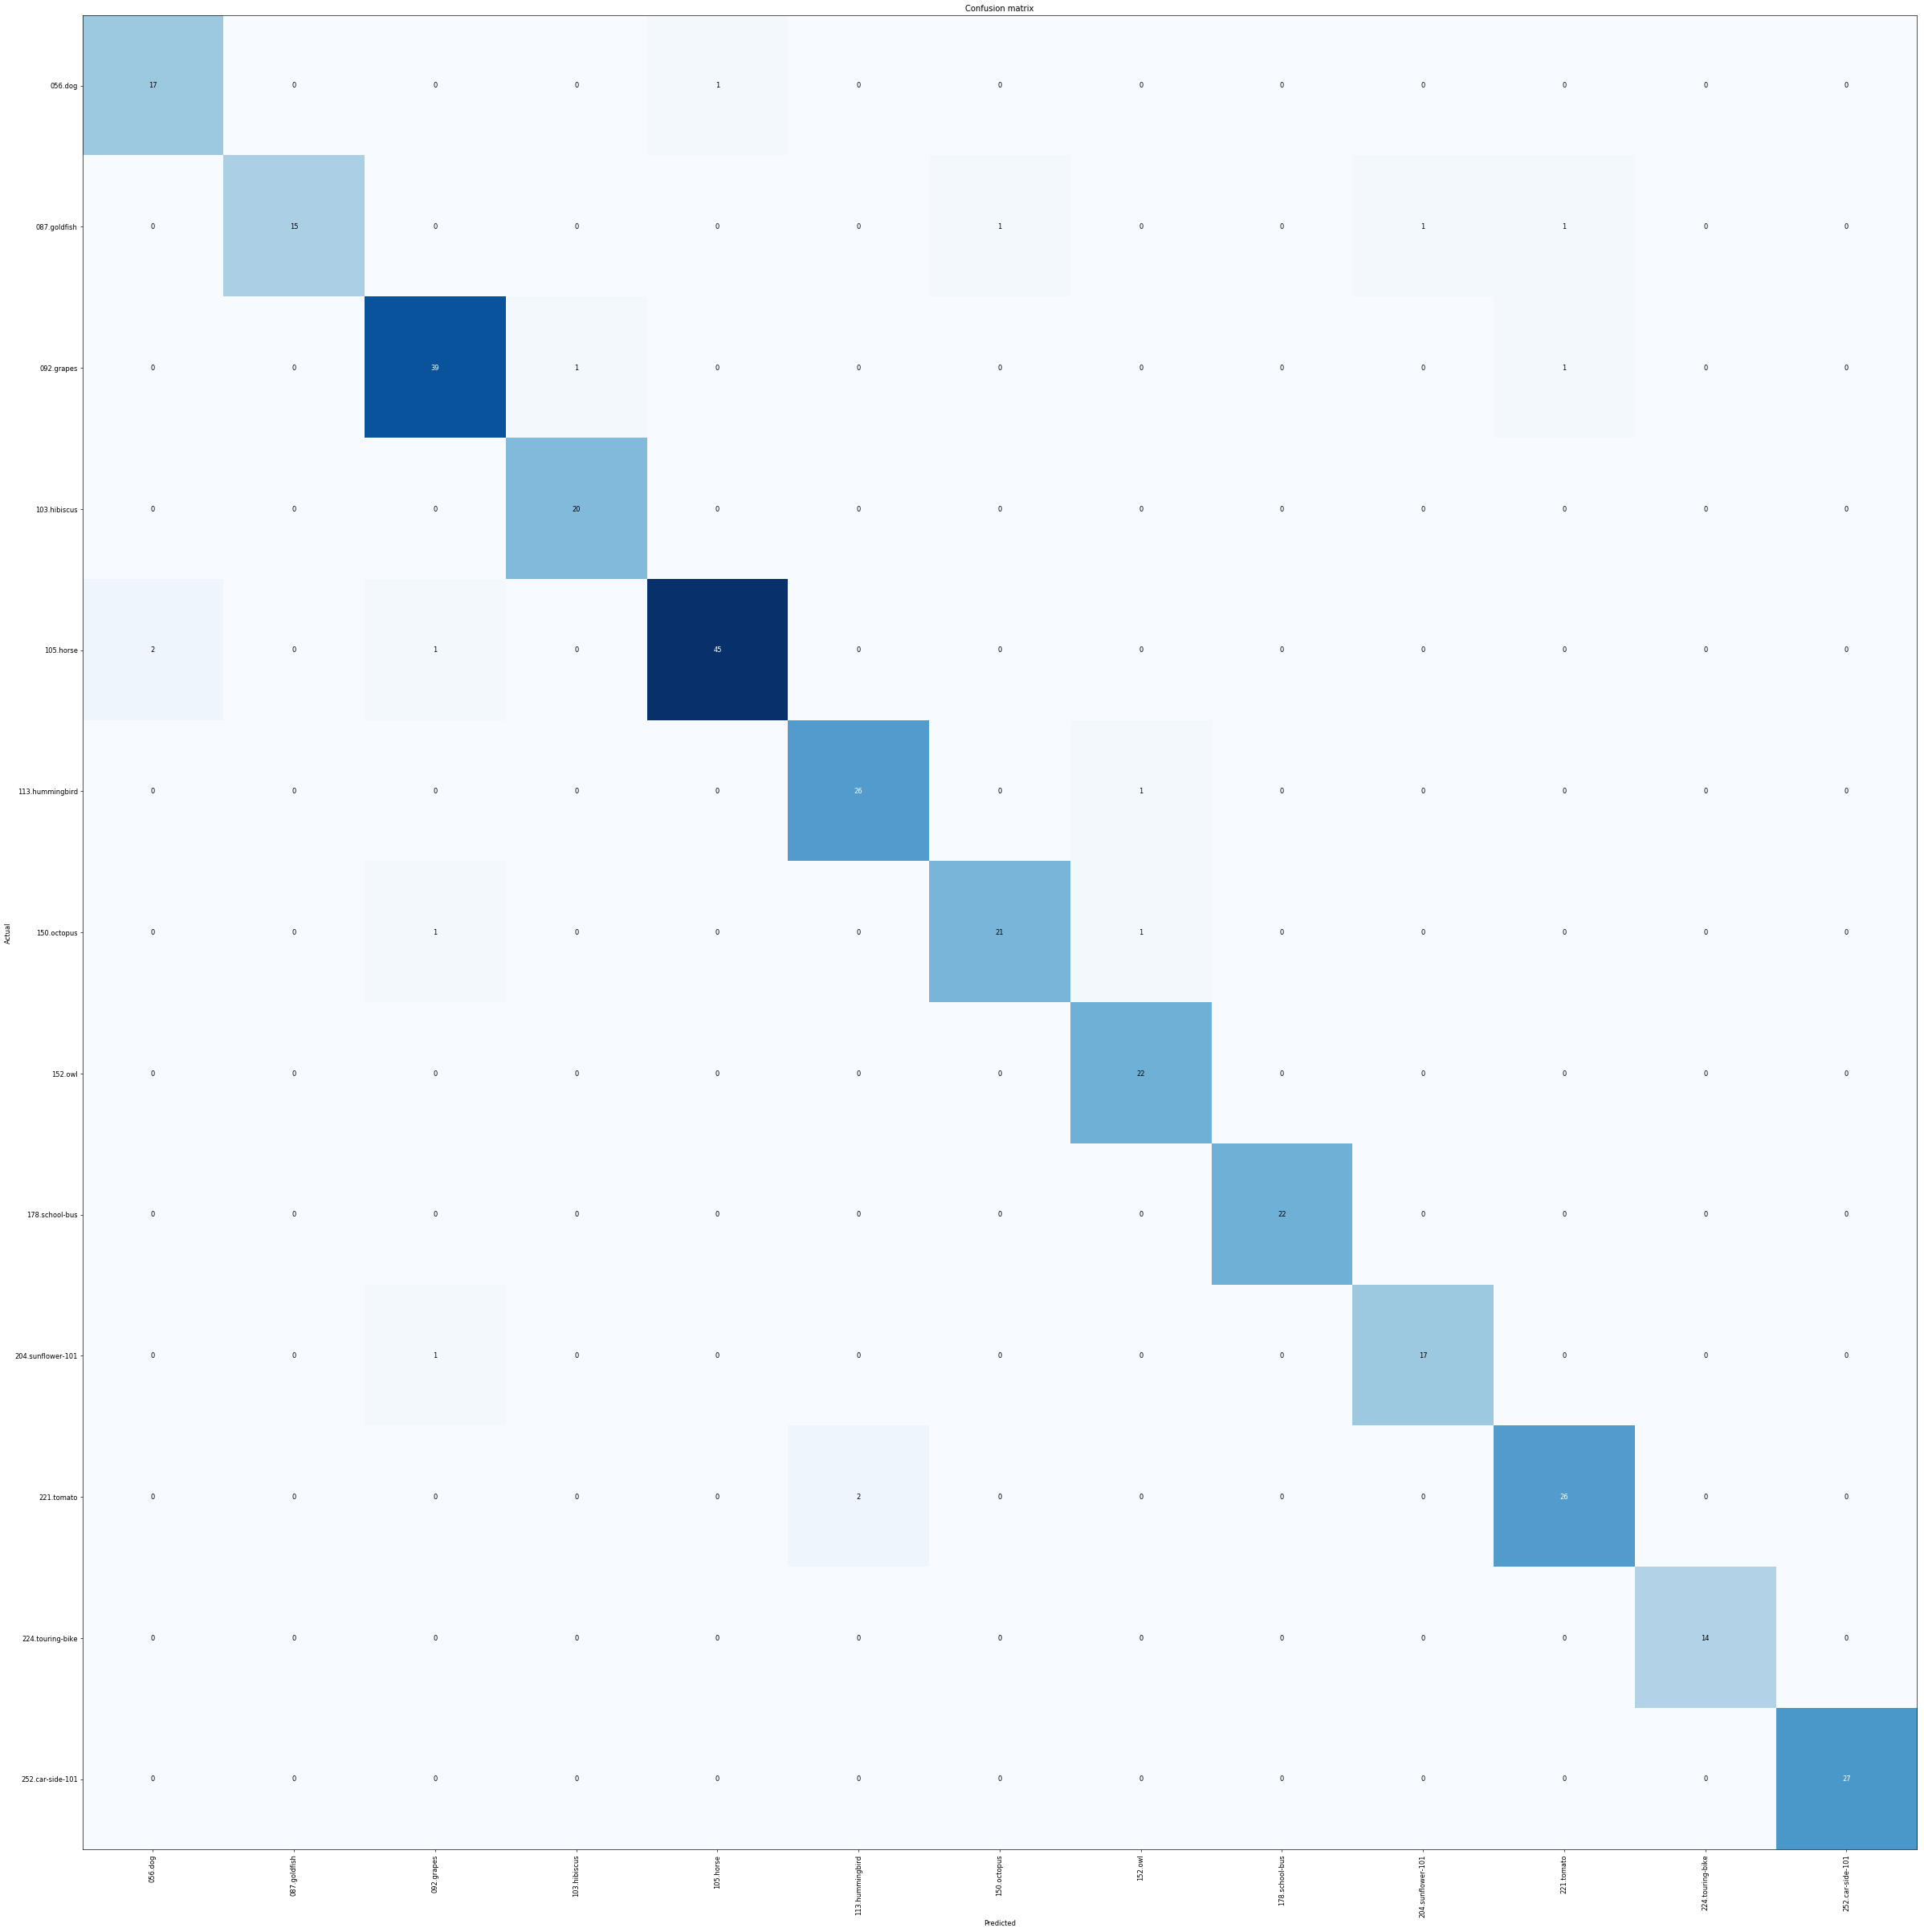

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(40,40), dpi=60)

In [14]:
learn.save('25_epoch_resnet34')

In [18]:
torch.save(learn.model.state_dict(), '25_epoch_resnet34.pth')

In [15]:
import torchvision.models as models
cnn_res = models.resnet34()

In [19]:
cnn_res = create_cnn(data, models.resnet34).load('25_epoch_resnet34')

M:\Anaconda\lib\site-packages\fastai\vision\learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [52]:
img=cnn_res.data.train_ds[1304][0]
x=cnn_res.predict(img)

In [50]:
len(cnn_res.data.train_ds)

1305

In [64]:
x[0]==fastai.core.Category('Category 252.car-side-101')

TypeError: __init__() missing 1 required positional argument: 'obj'

In [65]:
print(cnn_res)

Learner(data=ImageDataBunch;

Train: LabelList (1305 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
056.dog,056.dog,056.dog,056.dog,056.dog
Path: data\images;

Valid: LabelList (326 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
105.horse,152.owl,178.school-bus,224.touring-bike,087.goldfish
Path: data\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05

)], add_time=True, silent=None)
